# Summary and analysis

In [64]:
# import external modules
import sys, os
ROOT_PATH = os.path.abspath(".").split("src")[0]
module_path = os.path.abspath(os.path.join(ROOT_PATH+"/src/utils/"))
if module_path not in sys.path:
    sys.path.append(module_path)

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc 
from tabulate import tabulate
from itertools import cycle, islice

import functions as f
import dl_functions as dlf

In [65]:
# configure matplotlib params and plotting
sns.set()
sns.set_context('paper')
sns.set_style('whitegrid', {'axes.grid': True, 'grid.linestyle': '--'})
rc('figure', figsize=(12,6))
rc('xtick', labelsize=12)
rc('ytick', labelsize=12)
rc('axes', labelsize=13, titlesize=14)
rc('legend', fontsize=14, handlelength=2)
rc('font', family='serif')

## Load results obtained by all relevant notebooks
- Benchmarks
    - Simple heuristics
    - Linear models
    - Simple machine learning by Tree Based Methods
- Deep Learning
    - Recurrent Neural Networks (LSTM, GRU)
    - Multilayer Perceptron (MLP)


In [66]:
path = ROOT_PATH + "models/dataframes/"

# benchmarks
heuristics = pd.read_pickle(path + "simple_heuristics_df.pkl")
linear = pd.read_pickle(path + "linear_models_df.pkl")
ml = pd.read_pickle(path + "ml_df.pkl")

bm_summary = pd.read_pickle(path + "benchmarks_summary_df.pkl")
bm_summary_avg = pd.read_pickle(path + "avg_benchmarks_summary_df.pkl")

# deep learning
mlp = pd.read_pickle(path + "mlp_summary_df.pkl")
mlp_unc = pd.read_pickle(path + "mlp_uncertainty_df.pkl")

rnn = pd.read_pickle(path + "rnn_summary_df.pkl")
rnn_unc = pd.read_pickle(path + "rnn_uncertainty_df.pkl")

In [67]:
bm_merge = pd.concat([heuristics, linear, ml]).apply(pd.to_numeric)
dl_merge = pd.concat([rnn, mlp]).apply(pd.to_numeric)
all_merge = pd.concat([bm_merge,dl_merge])

In [68]:
def latexify(df):
    """
    Returns the latex table (string) of a pandas dataframe
    """
    
    multirow = type(df.index) == pd.core.indexes.multi.MultiIndex
    multicolumn = type(df.columns) == pd.core.indexes.multi.MultiIndex
    
    col_format = "ll" if multirow else "l"
    col_format += "c"*len(df.columns.levels[1])*2 if multicolumn else "c"*len(df.columns)
    
    tex = df.to_latex(column_format=col_format,
                      multicolumn=multicolumn, 
                      multicolumn_format='c',
                      multirow=multirow,
                      bold_rows=True)
    
    return tex

def get_summary(df, print_tex=False):
    df_sorted = df.sort_values(by=("Test", "Avg")).apply(pd.to_numeric)
    if print_tex: print(latexify(df_sorted))
    return df_sorted

## Summary for all models

In [69]:
df = get_summary(all_merge)
df

Validation                            Test                        
               FT      TT      PT     Avg      FT      TT      PT     Avg
LSTM       0.6042  0.3246  0.4286  0.4525  0.5422  0.3179  0.4153  0.4251
GRU        0.6169  0.3355  0.4454  0.4660  0.5526  0.3302  0.4383  0.4403
MLP        0.6492  0.3126  0.5063  0.4894  0.5895  0.2638  0.4919  0.4484
Linear     0.6987  0.2902  0.5101  0.4997  0.6158  0.2524  0.4907  0.4530
Ridge      0.6987  0.2902  0.5101  0.4997  0.6158  0.2524  0.4907  0.4530
ElNet      0.6986  0.2960  0.5104  0.5017  0.6141  0.2606  0.4905  0.4551
GBM        0.6565  0.3229  0.5107  0.4967  0.5904  0.2692  0.5084  0.4560
LASSO      0.6975  0.3011  0.5116  0.5034  0.6112  0.2708  0.4912  0.4578
RF         0.6677  0.3392  0.5222  0.5097  0.6048  0.2924  0.5127  0.4699
Prev.      0.9073  0.2212  0.5586  0.5624  0.7840  0.1830  0.5156  0.4942
MA         0.8342  0.7102  0.8331  0.7925  0.7439  0.7147  0.7606  0.7397
Mean       0.8573  1.3854  0.8328  1.0252  0.8106  1.6929  0.7612  1.0882

## Summary for benchmarks

In [70]:
# Overall summary
df = get_summary(bm_summary)
df

Validation                            Test                        
               FT      TT      PT     Avg      FT      TT      PT     Avg
Linear     0.6987  0.2902  0.5101  0.4997  0.6158  0.2524  0.4907  0.4530
Ridge      0.6987  0.2902  0.5101  0.4997  0.6158  0.2524  0.4907  0.4530
ElNet      0.6986  0.2960  0.5104  0.5017  0.6141  0.2606  0.4905  0.4551
GBM        0.6565  0.3229  0.5107  0.4967  0.5904  0.2692  0.5084  0.4560
LASSO      0.6975  0.3011  0.5116  0.5034  0.6112  0.2708  0.4912  0.4578
RF         0.6677  0.3392  0.5222  0.5097  0.6048  0.2924  0.5127  0.4699
Prev.      0.9073  0.2212  0.5586  0.5624  0.7840  0.1830  0.5156  0.4942
MA         0.8342  0.7102  0.8331  0.7925  0.7439  0.7147  0.7606  0.7397
Mean       0.8573  1.3854  0.8328  1.0252  0.8106  1.6929  0.7612  1.0882

In [10]:
# Simple heuristics
df = get_summary(heuristics)
df

Validation                            Test                        
              FT      TT      PT     Avg      FT      TT      PT     Avg
Prev.     0.9073  0.2212  0.5586  0.5624  0.7840  0.1830  0.5156  0.4942
MA        0.8342  0.7102  0.8331  0.7925  0.7439  0.7147  0.7606  0.7397
Mean      0.8573  1.3854  0.8328  1.0252  0.8106  1.6929  0.7612  1.0882

In [11]:
# Linear models
df = get_summary(linear)
df

Validation                            Test                        
               FT      TT      PT     Avg      FT      TT      PT     Avg
Linear     0.6987  0.2902  0.5101  0.4997  0.6158  0.2524  0.4907  0.4530
Ridge      0.6987  0.2902  0.5101  0.4997  0.6158  0.2524  0.4907  0.4530
ElNet      0.6986  0.2960  0.5104  0.5017  0.6141  0.2606  0.4905  0.4551
LASSO      0.6975  0.3011  0.5116  0.5034  0.6112  0.2708  0.4912  0.4578

In [12]:
# Tree based methods
df = get_summary(ml)
df

Validation                            Test                        
            FT      TT      PT     Avg      FT      TT      PT     Avg
GBM     0.6565  0.3229  0.5107  0.4967  0.5904  0.2692  0.5084  0.4560
RF      0.6677  0.3392  0.5222  0.5097  0.6048  0.2924  0.5127  0.4699

##  Results for Deep Learning

In [13]:
# Overall summary
df = get_summary(dl_merge)
df

Validation                            Test                        
             FT      TT      PT     Avg      FT      TT      PT     Avg
LSTM     0.6042  0.3246  0.4286  0.4525  0.5422  0.3179  0.4153  0.4251
GRU      0.6169  0.3355  0.4454  0.4660  0.5526  0.3302  0.4383  0.4403
MLP      0.6492  0.3126  0.5063  0.4894  0.5895  0.2638  0.4919  0.4484

In [14]:
# rnns
df = get_summary(rnn)
df

Validation                            Test                        
             FT      TT      PT     Avg      FT      TT      PT     Avg
LSTM     0.6042  0.3246  0.4286  0.4525  0.5422  0.3179  0.4153  0.4251
GRU      0.6169  0.3355  0.4454  0.4660  0.5526  0.3302  0.4383  0.4403

In [15]:
# rnn uncertainty
#print(latexify(rnn_unc))
rnn_unc

Validation                       Test                   
                MAE Exp. Mean Exp. Std     MAE Exp. Mean Exp. Std
LSTM FT      0.6042   -0.3187   0.1941  0.5422   -0.4487   0.2086
     TT      0.3246    1.2830   0.2038  0.3179    1.7155   0.2430
     PT      0.4286    0.0015   0.1705  0.4153   -0.0224   0.1848
     Avg     0.4525    0.3219   0.1895  0.4251    0.4148   0.2121
GRU  FT      0.6169   -0.2786   0.2220  0.5526   -0.4145   0.2239
     TT      0.3355    1.1879   0.2358  0.3302    1.5986   0.2619
     PT      0.4454   -0.0567   0.2044  0.4383   -0.0764   0.2129
     Avg     0.4660    0.2842   0.2207  0.4403    0.3692   0.2329

In [16]:
# rnns
df = get_summary(mlp)
df

Validation                            Test                        
            FT      TT      PT     Avg      FT      TT      PT     Avg
MLP     0.6492  0.3126  0.5063  0.4894  0.5895  0.2638  0.4919  0.4484

In [17]:
# mlp uncertainty
#print(latexify(mlp_unc))
mlp_unc

Validation                       Test                   
               MAE Exp. Mean Exp. Std     MAE Exp. Mean Exp. Std
MLP FT      0.6492   -0.3305   0.1262  0.5895   -0.4954   0.1388
    TT      0.3126    1.2708   0.0961  0.2638    1.6688   0.1142
    PT      0.5063   -0.0354   0.1000  0.4919   -0.0753   0.1129
    Avg     0.4894    0.3017   0.1074  0.4484    0.3660   0.1220

# Plots

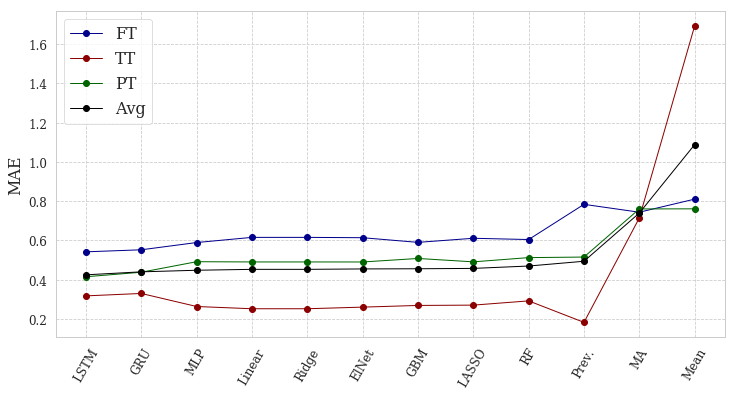

In [20]:
all_merge_sorted = get_summary(all_merge)

x_axis = all_merge_sorted['Test'].index.tolist()
plt.figure()
plt.plot(all_merge_sorted['Test']['FT'], marker="o", markersize=6, lw=1, c="darkblue", label="FT")
plt.plot(all_merge_sorted['Test']['TT'], marker="o", markersize=6, lw=1, c="darkred", label="TT")
plt.plot(all_merge_sorted['Test']['PT'], marker="o", markersize=6, lw=1, c="darkgreen", label="PT")
plt.plot(all_merge_sorted['Test']['Avg'], marker="o", markersize=6, lw=1, c="black", label="Avg")
plt.xticks(all_merge_sorted.index.tolist(), rotation=60)
plt.ylabel("MAE", fontsize=16)
plt.legend(prop={'size': 16})
plt.show()

<Figure size 864x432 with 0 Axes>

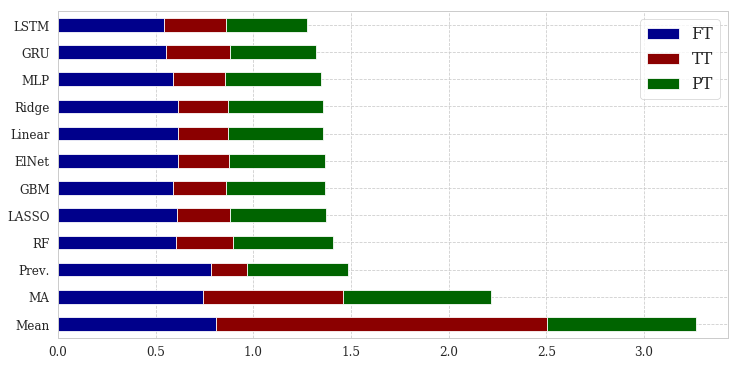

In [21]:
data = all_merge.sort_values(by=('Test', 'Avg'), ascending=False)['Test'][["FT", "TT", "PT"]]
my_colors = list(islice(cycle(['darkblue', 'darkred', 'darkgreen', 'darkgray', 'black']), None, len(data)))

plt.figure()
data.plot.barh(stacked=True, color=my_colors)
plt.legend(prop={'size': 16})
plt.show()

In [26]:
all_merge['Test']

,FT,TT,PT,Avg
Prev.,0.7840,0.1830,0.5156,0.4942
Mean,0.8106,1.6929,0.7612,1.0882
MA,0.7439,0.7147,0.7606,0.7397
Linear,0.6158,0.2524,0.4907,0.4530
Ridge,0.6158,0.2524,0.4907,0.4530
ElNet,0.6141,0.2606,0.4905,0.4551
LASSO,0.6112,0.2708,0.4912,0.4578
RF,0.6048,0.2924,0.5127,0.4699
GBM,0.5904,0.2692,0.5084,0.4560
LSTM,0.5422,0.3179,0.4153,0.4251


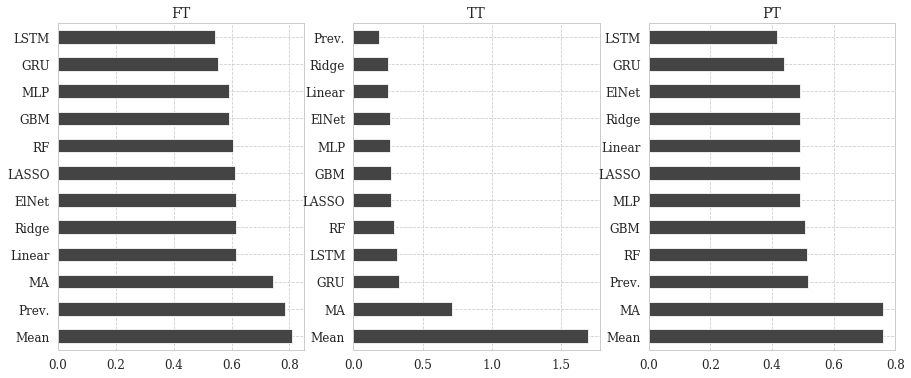

<Figure size 864x432 with 0 Axes>

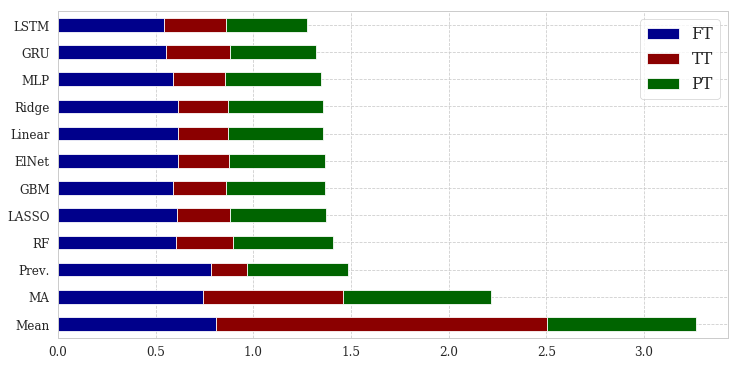

In [63]:
i = 0


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
for i, ax in enumerate(axs): 
    feature = all_merge["Test"].columns[i]
    df = all_merge['Test'].sort_values(by=(feature), ascending=False)[feature]
    
    df.plot.barh(ax=ax, color="#444444")
    ax.set_title(feature)

data = all_merge.sort_values(by=('Test', 'Avg'), ascending=False)['Test'][["FT", "TT", "PT"]]
my_colors = list(islice(cycle(['darkblue', 'darkred', 'darkgreen', 'darkgray', 'black']), None, len(data)))

plt.figure()
data.plot.barh(stacked=True, color=my_colors)
plt.legend(prop={'size': 16})
plt.show()
    

In [32]:
df

,FT,TT,PT,Avg
LSTM,0.5422,0.3179,0.4153,0.4251
GRU,0.5526,0.3302,0.4383,0.4403
MLP,0.5895,0.2638,0.4919,0.4484
GBM,0.5904,0.2692,0.5084,0.4560
RF,0.6048,0.2924,0.5127,0.4699
LASSO,0.6112,0.2708,0.4912,0.4578
ElNet,0.6141,0.2606,0.4905,0.4551
Linear,0.6158,0.2524,0.4907,0.4530
Ridge,0.6158,0.2524,0.4907,0.4530
MA,0.7439,0.7147,0.7606,0.7397
